<a href="https://colab.research.google.com/github/ymeshulam/deep-learning-project-A/blob/main/Heart_Disease_Final_Prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease

Kaggle: [Heart Disease Dataset](https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data)

#### About Dataset

This dataset contains various health indicators and risk factors related to heart disease. Parameters such as age, gender, blood pressure, cholesterol levels, smoking habits, and exercise patterns have been collected to analyze heart disease risk and contribute to health research. The dataset can be used by healthcare professionals, researchers, and data analysts to examine trends related to heart disease, identify risk factors, and perform various health-related analyses.

## Loading the Dataset

#### imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


#### Setting Up the heart disease data frame

In [ ]:
# IMPORTANT!!

# "Alcohol Consumption" contain "None" as a VALID value, but treated by default as NULL
#
# keep_default_na=False is a MUST
#

df = pd.read_csv('heart_disease.csv', na_values=["", "NA", "null"], keep_default_na=False)

df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


#### Evaluation Functions

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

def print_classification_report(y_true, y_pred, show_roc=True):

    cm = confusion_matrix(y_true, y_pred)

    print(y_true.value_counts())
    print("[[TN FP] \n [FN TP]]")

    print(cm)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')

    print(f'F1 Score: {f1:.2f}')

    # AUC-ROC Score
    auc_roc = roc_auc_score(y_true, y_pred)
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    # print(classification_report(y_true, y_pred))


    if (show_roc):
      fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=y.unique()[1])
      roc_auc = auc(fpr, tpr)
      plt.figure(figsize=(4, 3))
      plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('ROC Curve')
      plt.legend(loc='lower right')
      plt.show()

def calc_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

def clac_precision_score(y_true, y_pred):
    return precision_score(y_true, y_pred, zero_division=0)

def calc_recall_score(y_true, y_pred):
    return recall_score(y_true, y_pred, zero_division=0)

## Exploratory Data Analysis (EDA)

### Statistics: Shape, Numeric & Categorical Distributions

Understand the fundamental characteristics of each feature (including measures of central tendency and spread), which helps identify potential anomalies or skew in both numeric and categorical variables

#### Shape and Features

In [ ]:
rows, cols = df.shape

print("----------------------------------------------------------------")
print(f'Heart Disease dataset contain {rows} rows and {cols} columns.')
print("----------------------------------------------------------------")

# Get numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
num_numeric = len(numeric_columns)

# Get categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns
num_categorical = len(categorical_columns)

print(f"Number of numeric columns: {num_numeric}")
print(f"Number of categorical columns: {num_categorical}")

# Optional: Print column names
print("\nNumeric columns:", numeric_columns.tolist())
print("\nCategorical columns:", categorical_columns.tolist())


----------------------------------------------------------------
Heart Disease dataset contain 10000 rows and 21 columns.
----------------------------------------------------------------
Number of numeric columns: 9
Number of categorical columns: 12

Numeric columns: ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

Categorical columns: ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']


In [ ]:
df['Heart Disease Status'].value_counts(normalize=True)

,proportion
Heart Disease Status,
No,0.8
Yes,0.2


#### Numeric Statistics

In [ ]:
# Split into numeric and categorical columns
numeric_df = df.select_dtypes(include=['number'])

# Describe numeric columns
numeric_summary = numeric_df.describe()

# Display summaries
print("--------------------------------------------------")
print("Numeric Summary:")
print("--------------------------------------------------")
print(numeric_summary)


--------------------------------------------------
Numeric Summary:
--------------------------------------------------
               Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195    

#### Categorical Statistics

In [ ]:
# Split into numeric and categorical columns
categorical_df = df.select_dtypes(exclude=['number'])

# Describe categorical columns
categorical_summary = categorical_df.describe()

print("--------------------------------------------------")
print("\nCategorical Summary:")
print("--------------------------------------------------")
print(categorical_summary)

--------------------------------------------------

Categorical Summary:
--------------------------------------------------
       Gender Exercise Habits Smoking Family Heart Disease Diabetes  \
count    9981            9975    9975                 9979     9970   
unique      2               3       2                    2        2   
top      Male            High     Yes                   No       No   
freq     5003            3372    5123                 5004     5018   

       High Blood Pressure Low HDL Cholesterol High LDL Cholesterol  \
count                 9974                9975                 9974   
unique                   2                   2                    2   
top                    Yes                 Yes                   No   
freq                  5022                5000                 5036   

       Alcohol Consumption Stress Level Sugar Consumption Heart Disease Status  
count                 9968         9978              9970                10000  
un

### Correlations: Numeric Vs Numeric | Predictor vs Target

Examine how **numeric predictors** relate to each other and to the target variable, highlighting potential multicollinearity or strong relationships that can inform further analysis or feature engineering.  
**Assess** whether **categorical** variables are significantly **associated** with heart disease status, providing a statistical basis for deciding if these features may be useful predictors

#### Correlation between the numeric columns

BMI                  Cholesterol Level      0.022002
Cholesterol Level    Age                    0.011371
Age                  BMI                    0.011229
Sleep Hours          Cholesterol Level      0.011195
Fasting Blood Sugar  CRP Level              0.010479
Age                  CRP Level              0.008779
Fasting Blood Sugar  Sleep Hours            0.008586
Triglyceride Level   Blood Pressure         0.008108
                     Fasting Blood Sugar    0.008086
BMI                  Fasting Blood Sugar    0.006437
Blood Pressure       BMI                    0.005405
Triglyceride Level   BMI                    0.005354
BMI                  Homocysteine Level     0.003583
Sleep Hours          Age                    0.002481
Triglyceride Level   Sleep Hours            0.002166
Sleep Hours          CRP Level              0.002067
Triglyceride Level   Cholesterol Level      0.001451
Blood Pressure       Sleep Hours            0.001153
Cholesterol Level    Fasting Blood Sugar    0.

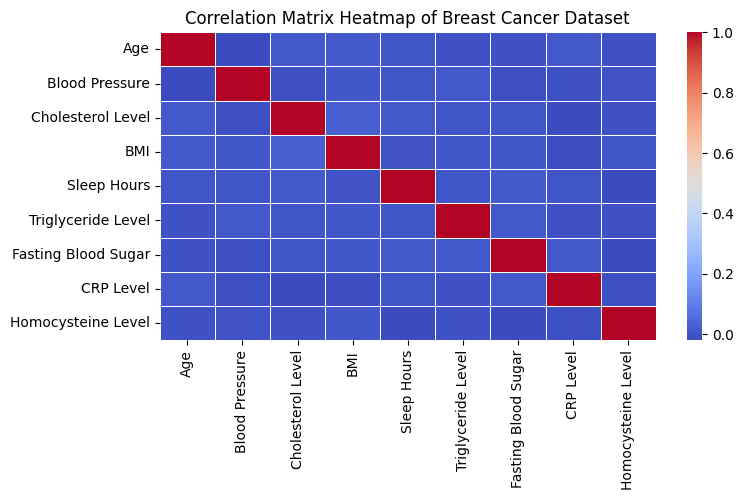

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[
    (correlation_pairs > 0) & (correlation_pairs < 1.0)
].drop_duplicates()

# Extracting the pairs of features
high_features = correlation_pairs.index.to_list()

# Display the top correlated feature pairs
print(correlation_pairs)

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Heart Disease Dataset')
plt.show()

#### Correlation between each numeric column vs Heart Disease Status

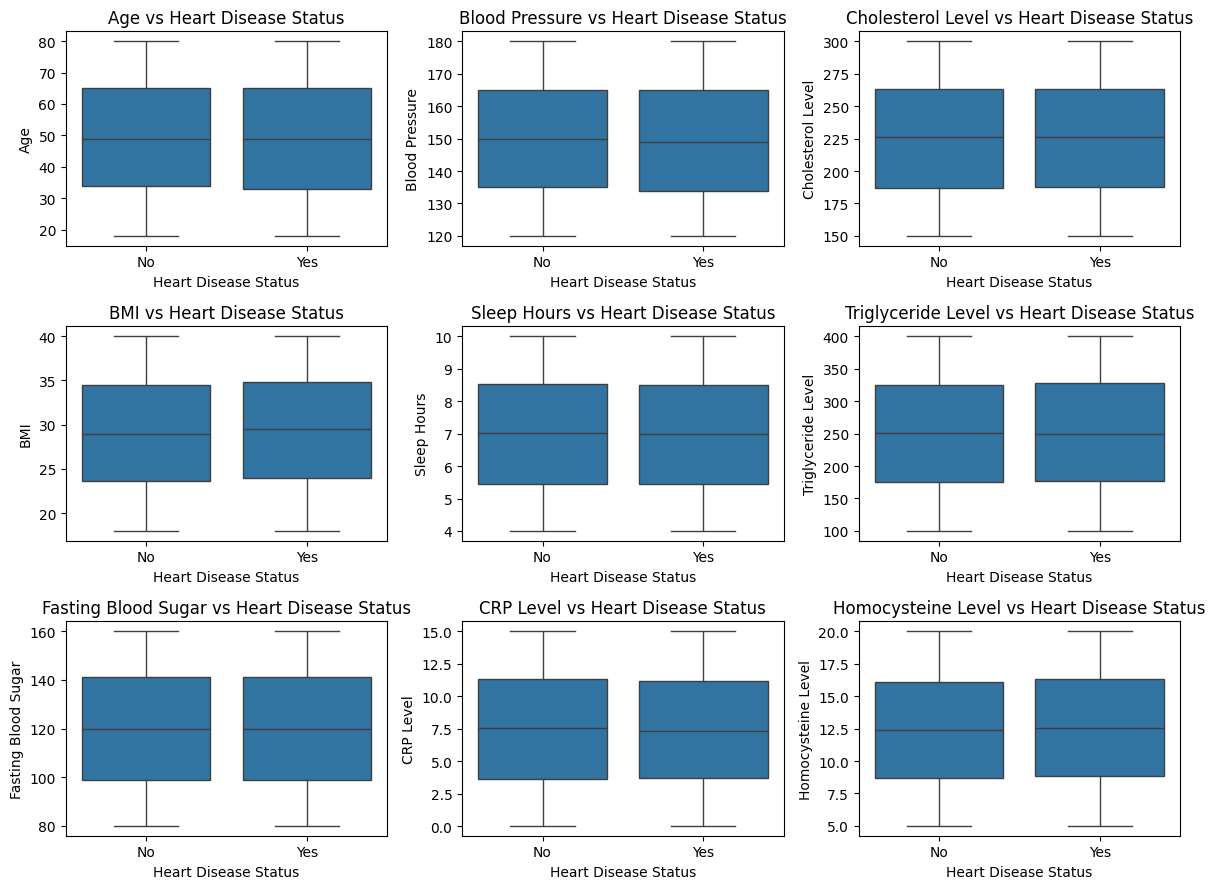

In [ ]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create subplots
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=3, figsize=(12, 3 * ((num_cols + 2) // 3)))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x='Heart Disease Status', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Heart Disease Status')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Relationship Between categorical Columns vs Heart Disease Status (Chi Squared)

In [ ]:
from scipy.stats import chi2_contingency

# Example: Test association between 'Stress Level' and 'Heart Disease Status'
# contingency_table = pd.crosstab(df['Stress Level'], df['Heart Disease Status'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print(f"Chi-squared: {chi2}, p-value: {p}")

# Identify categorical columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Target variable
target = 'Heart Disease Status'

# Perform Chi-Squared Test for each categorical predictor
results = []
for col in categorical_columns:
    if col != target:  # Exclude the target variable itself
        # Create contingency table
        contingency_table = pd.crosstab(df[col], df[target])

        # Perform Chi-Squared Test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Append results
        results.append({'Predictor': col, 'Chi-Squared': chi2, 'p-value': p, 'Degrees of Freedom': dof})

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Sort results by p-value
results_df = results_df.sort_values(by='p-value')

results_df

,Predictor,Chi-Squared,p-value,Degrees of Freedom
9,Stress Level,7.725661,0.021008,2
0,Gender,2.643460,0.103977,1
8,Alcohol Consumption,3.384412,0.336066,3
7,High LDL Cholesterol,0.586995,0.443584,1
3,Family Heart Disease,0.430652,0.511669,1
10,Sugar Consumption,1.329256,0.514465,2
6,Low HDL Cholesterol,0.276242,0.599175,1
1,Exercise Habits,0.449485,0.798722,2
4,Diabetes,0.060208,0.806167,1
2,Smoking,0.048876,0.825031,1


##### Based on Chi-Squared Stress Level Vs Heart Disease Visualization

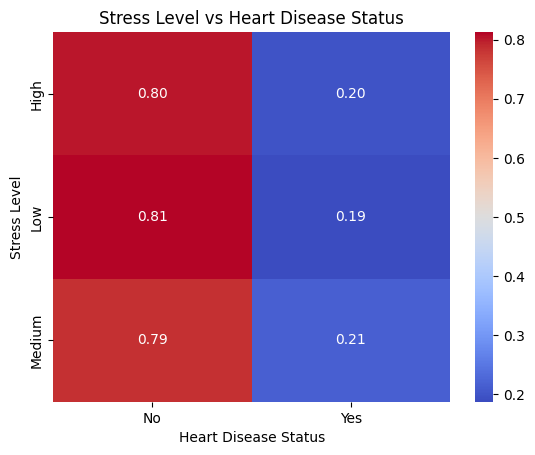

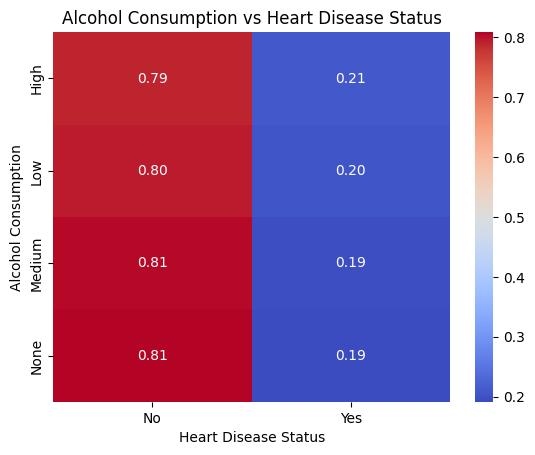

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a normalized crosstab
crosstab = pd.crosstab(df['Stress Level'], df['Heart Disease Status'], normalize='index')

# Heatmap
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Stress Level vs Heart Disease Status')
plt.ylabel('Stress Level')
plt.xlabel('Heart Disease Status')
plt.show()

crosstab = pd.crosstab(df['Alcohol Consumption'], df['Heart Disease Status'], normalize='index')

# Heatmap
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Alcohol Consumption vs Heart Disease Status')
plt.ylabel('Alcohol Consumption')
plt.xlabel('Heart Disease Status')
plt.show()


### Features Distribution Visualization: Violin, Boxplots, Histplots

Visually inspect the distribution, spread, and potential outliers of each numeric feature, providing an intuitive understanding of each variable’s behavior and detecting anomalies or skewed data.

#### Violin & Boxplots

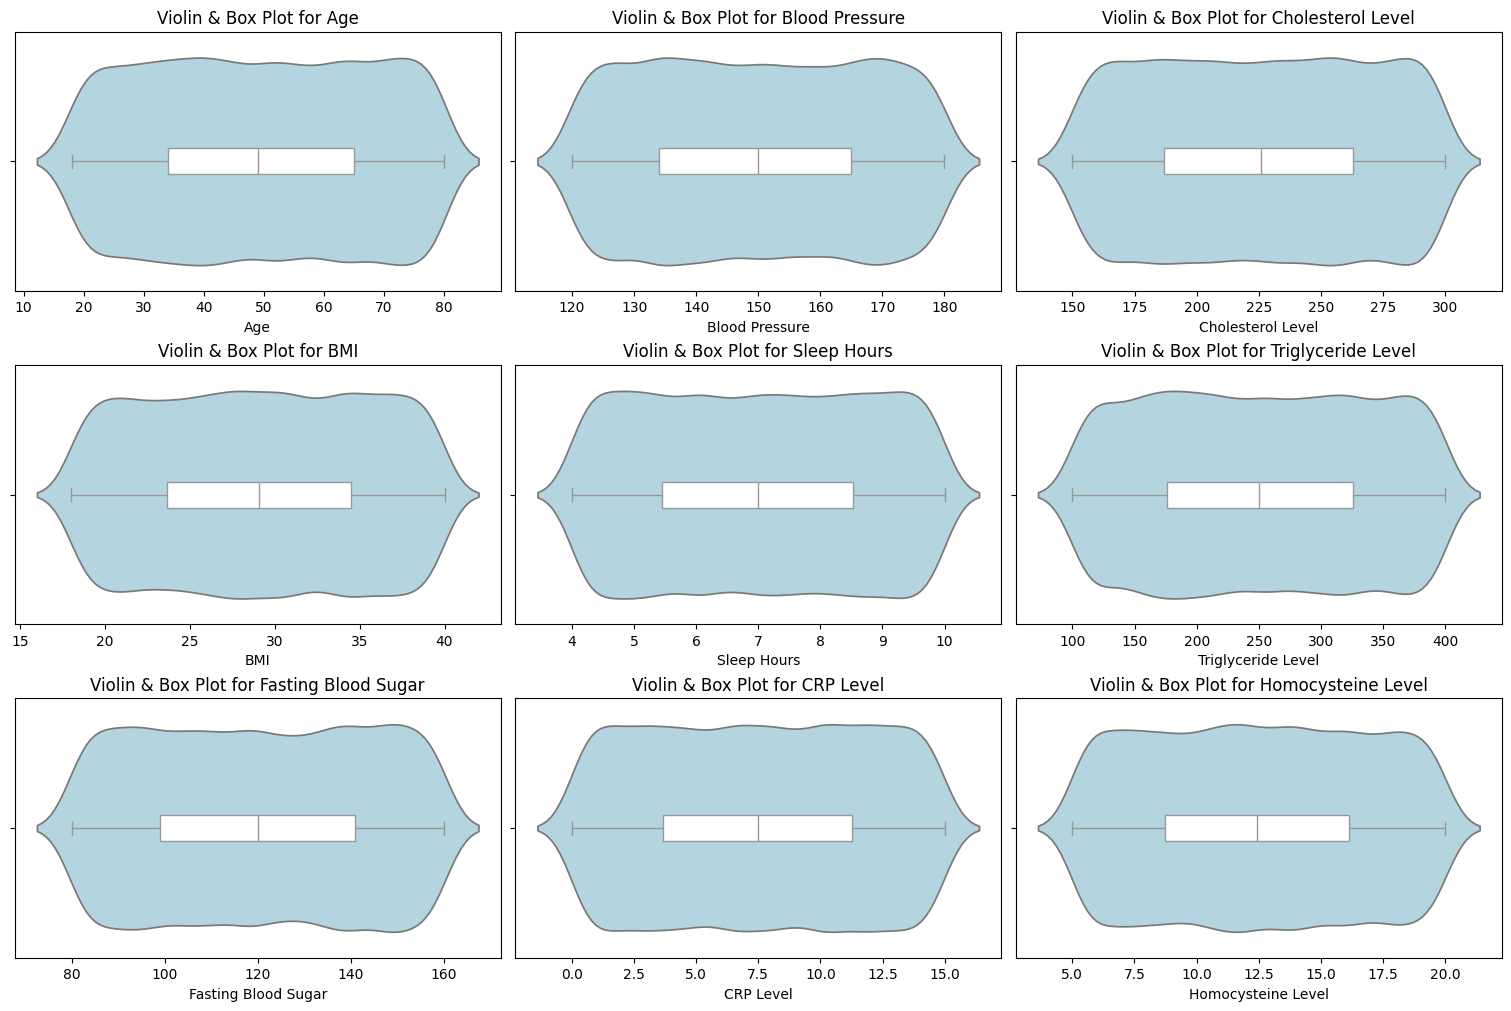

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Set up the grid for subplots (3 rows, variable number of columns)
n_rows = 3
n_cols = int(np.ceil(len(numeric_columns) / n_rows))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each numeric column
for idx, column in enumerate(numeric_columns):
    sns.violinplot(x=df[column], ax=axes[idx], inner=None, color="lightblue")  # Violin plot
    sns.boxplot(x=df[column], ax=axes[idx], color="white", width=0.1)          # Box plot overlay
    axes[idx].set_title(f'Violin & Box Plot for {column}')
    axes[idx].set_xlabel(column)

# Hide any unused subplots
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.show()


#### Histplots

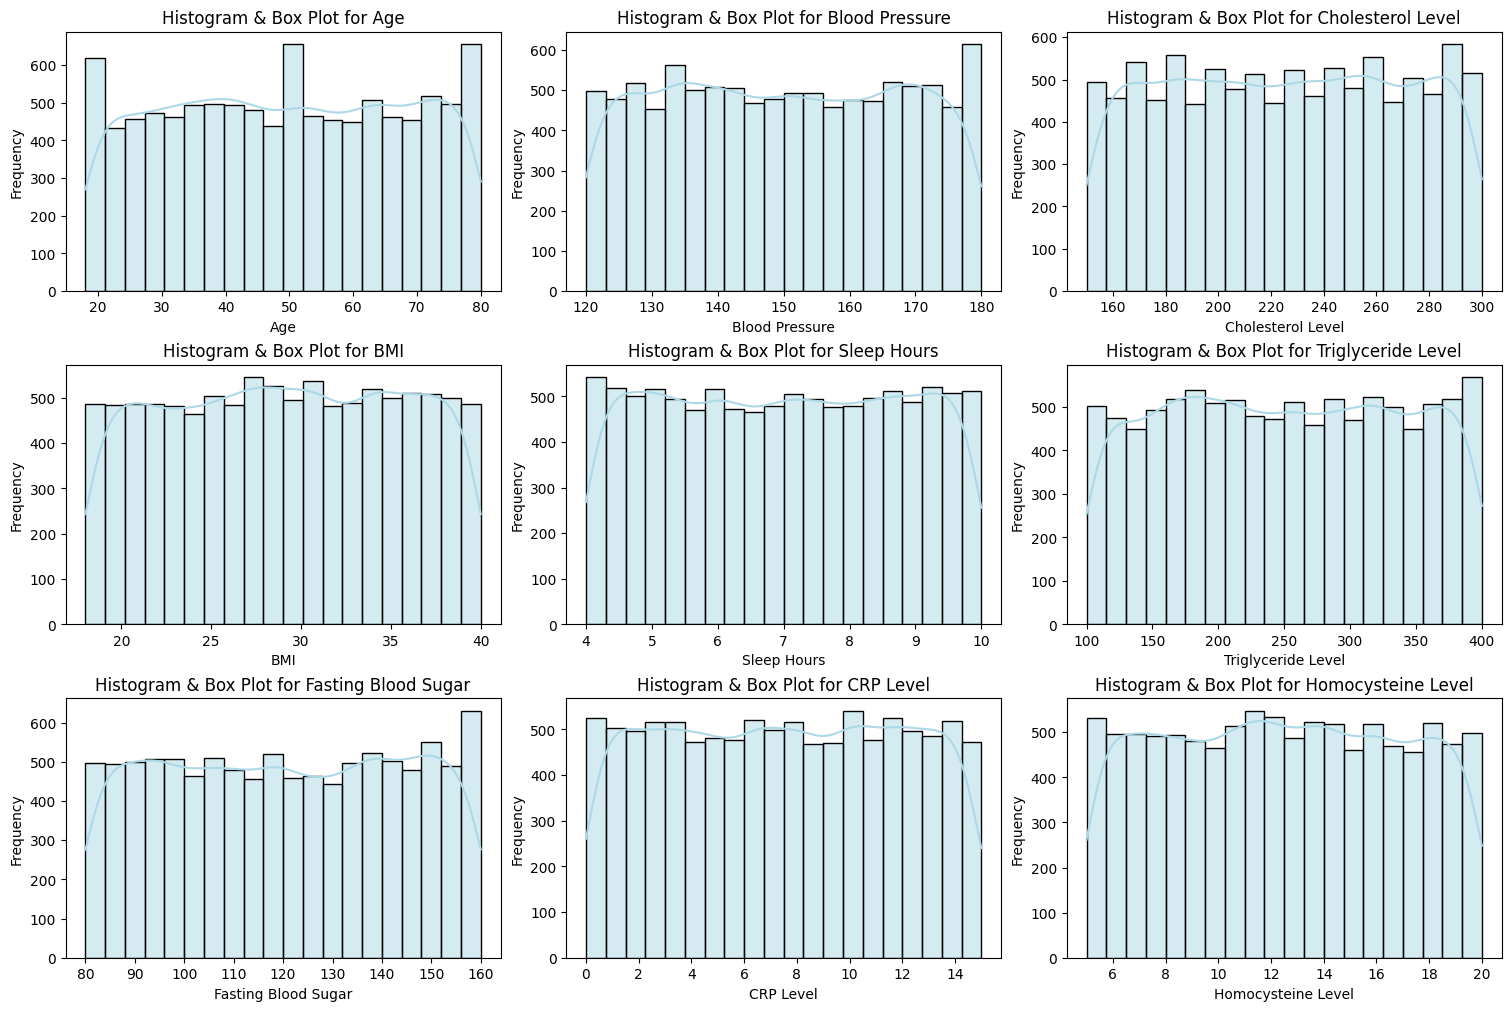

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Set up the grid for subplots (3 rows, variable number of columns)
n_rows = 3
n_cols = int(np.ceil(len(numeric_columns) / n_rows))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each numeric column
for idx, column in enumerate(numeric_columns):
    ax = axes[idx]

    # Plot histogram with KDE
    sns.histplot(df[column].dropna(), kde=True, bins=20, color="lightblue", alpha=.5, ax=ax)

    # Set titles and labels
    ax.set_title(f'Histogram & Box Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.show()


## Preprocessing | Handle Nulls | Handle Categorical Features

**Determine** the extent and pattern of **missing data** across features and assess potential biases in the target variable. This guides whether dropping missing values or applying imputation techniques is most appropriate.   
**Prepare categorical** variables for machine learning algorithms by converting them into suitable numeric representations, facilitating proper model training and improved predictive performance.

#### Handling Empty Cells & Nulls (Drop and Imputation)

##### Nulls Status

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

total_nulls_data = []
for column in df.columns:
    total_nulls = df[column].isnull().sum()
    total_nulls_data.append({
        "Name": column,
        "Total Nulls": total_nulls
    })

total_numeric_nulls = df[numeric_columns].isnull().sum()
total_categorical_nulls = df[categorical_columns].isnull().sum()

print("---------------------------------------")
print(f"Total Numeric Nulls: {total_numeric_nulls.sum()}")
print(f"Total Categorical Nulls: {total_categorical_nulls.sum()}")
print(f"Total Nulls: {total_numeric_nulls.sum() + total_categorical_nulls.sum()}")
print("---------------------------------------")

# Create a summary table
total_nulls_table = pd.DataFrame(total_nulls_data)

total_nulls_table

---------------------------------------
Total Numeric Nulls: 219
Total Categorical Nulls: 281
Total Nulls: 500
---------------------------------------


,Name,Total Nulls
0,Age,29
1,Gender,19
2,Blood Pressure,19
3,Cholesterol Level,30
4,Exercise Habits,25
5,Smoking,25
6,Family Heart Disease,21
7,Diabetes,30
8,BMI,22
9,High Blood Pressure,26


##### Null Distribution Vs Target Variable (Heart Disease Status)

In [ ]:
summary_data = []
for column in df.columns:
    if df[column].isnull().any():
        # Count nulls for 'Yes' and 'No' in 'Heart Disease Status'
        nulls_yes = df[df[column].isnull() & (df['Heart Disease Status'] == "Yes")].shape[0]
        nulls_no = df[df[column].isnull() & (df['Heart Disease Status'] == "No")].shape[0]
        column_type = "Numeric" if column in numeric_columns else "Categorical"
        summary_data.append({
            "Name": column,
            "Type": column_type,
            "Nulls in 'Yes'": nulls_yes,
            "Nulls in 'No'": nulls_no
        })

# Create a summary table
null_summary_table = pd.DataFrame(summary_data).sort_values(by="Type", ascending=False)

null_summary_table

,Name,Type,Nulls in 'Yes',Nulls in 'No'
0,Age,Numeric,4,25
8,BMI,Numeric,2,20
18,CRP Level,Numeric,8,18
17,Fasting Blood Sugar,Numeric,7,15
16,Triglyceride Level,Numeric,10,16
14,Sleep Hours,Numeric,2,23
19,Homocysteine Level,Numeric,2,18
3,Cholesterol Level,Numeric,5,25
2,Blood Pressure,Numeric,4,15
7,Diabetes,Categorical,6,24


In [ ]:
import pandas as pd

missing_counts = df.isnull().sum()
total_rows = len(df)

missing_percentage = missing_counts / total_rows * 100

# Display only features with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Age                     0.29
Gender                  0.19
Blood Pressure          0.19
Cholesterol Level       0.30
Exercise Habits         0.25
Smoking                 0.25
Family Heart Disease    0.21
Diabetes                0.30
BMI                     0.22
High Blood Pressure     0.26
Low HDL Cholesterol     0.25
High LDL Cholesterol    0.26
Alcohol Consumption     0.32
Stress Level            0.22
Sleep Hours             0.25
Sugar Consumption       0.30
Triglyceride Level      0.26
Fasting Blood Sugar     0.22
CRP Level               0.26
Homocysteine Level      0.20
dtype: float64


All features have less then 1% missing values (ranging from 0.19% to 0.32%). No feature has more than 1% missing data, which means the missing values are not significant in proportion to the dataset.
No extreme imbalance across different types of features (Numeric vs. Categorical).

##### Dropping Nulls Values

In [ ]:
df = df.dropna()

df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


##### Data Imputation - NO NEED

In [ ]:

# NOTE - TBD

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target (y)
X = df.drop(columns=['Heart Disease Status'])  # Independent variables
y = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})  # Convert to binary (0/1)

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

# Preprocessing pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
    ('encoder', OneHotEncoder(drop='first'))  # One-hot encode categorical variables
])

# Apply transformations
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Transform data
X_preprocessed = preprocessor.fit_transform(X)

# Split into train/test sets
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [ ]:
# Approach 1: Replace all numeric nulls with the mean value
# df_mean_imputed = df.copy()

# for column in df_mean_imputed.select_dtypes(include=['number']).columns:
#     mean_value = df_mean_imputed[column].mean()
#     df_mean_imputed[column] = df_mean_imputed[column].fillna(mean_value)  # Assign back to the column

# # # Approach 2: Remove all rows with numeric nulls
# df_numeric_nulls_removed = df.dropna(subset=df.select_dtypes(include=['number']).columns)

# # # Output the shapes of the resulting DataFrames
# df_mean_imputed_shape = df_mean_imputed.shape
# df_numeric_nulls_removed_shape = df_numeric_nulls_removed.shape

# df_mean_imputed_shape, df_numeric_nulls_removed_shape

# df_imputed = df_numeric_nulls_removed

# df_imputed

### Data Transforming

This transformation converts categorical variables into numerical representations using one-hot encoding, ensuring compatibility with machine learning models. The drop_first=True parameter prevents redundancy and multicollinearity, while converting all values to float maintains data consistency for efficient computation. This step enhances model interpretability and performance by making the dataset fully numeric

#### Convert Categorical Features using OneHotEncoder - recommanded approach

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_data = df.select_dtypes(exclude=['number'])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

categorical_data_encoded = encoder.fit_transform(categorical_data)

# Show the shape and a preview of the encoded categorical data
categorical_data_encoded.shape, categorical_data_encoded[:5]

# Show the shape and a preview of the encoded categorical data
categorical_data_encoded.shape, categorical_data_encoded[:5]

categorical_encoded_df = pd.DataFrame(
    categorical_data_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=df.index
)

# Step 2: Drop original categorical columns
df_without_categorical = df.drop(columns=categorical_columns)

# Step 3: Concatenate the original DataFrame (without categorical) with the encoded DataFrame
df_with_dummies = pd.concat([df_without_categorical, categorical_encoded_df], axis=1)

# Show the resulting DataFrame
df_with_dummies.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Male,...,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Alcohol Consumption_Low,Alcohol Consumption_Medium,Alcohol Consumption_None,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status_Yes
1,69.0,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,46.0,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,32.0,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,25.0,152.0,257.0,28.144681,5.504876,126.0,91.0,4.297575,10.815983,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Convert Categorical Features using Dummies (Option 2)

In [ ]:
# categorical_columns = df.select_dtypes(exclude=['number']).columns

# df_with_dummies_2 = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# df_with_dummies_2 = df_with_dummies.astype(float)

# df_with_dummies_2.head()

## Data Splitting - Training | Validation | Test

Splitting data into training, validation, and test sets ensures a robust machine learning model. The training set is used to learn patterns, the validation set helps tune hyperparameters and prevent overfitting, and the test set provides an unbiased evaluation of final model performance. This approach ensures generalization to unseen data and avoids misleading performance estimates.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_data(df, target_column, print_details=True, test_size_vs_train=0.3, test_vs_val=0.5):
  # Define the target column

  rows, cols = df.shape

  print("----------------------------------------------------------------")
  print(f'Heart Disease dataset contain {rows} rows and {cols} columns.')
  print("----------------------------------------------------------------")


  total_samples = df.shape[0];

  # Fill missing values and standardize features
  scaler = StandardScaler()

  # Training vs Val & Test
  train_data, temp_data = train_test_split(df, test_size=test_size_vs_train, random_state=42)

  # Validation vs Test
  val_data, test_data = train_test_split(temp_data, test_size=test_vs_val, random_state=42)

  # Separate features (X) and target (Y) for training, validation, and test datasets
  X_train = train_data.drop(columns=[target_column])
  X_train = scaler.fit_transform(X_train)

  Y_train = train_data[target_column]

  X_val = val_data.drop(columns=[target_column])
  X_val = scaler.fit_transform(X_val)

  Y_val = val_data[target_column]

  X_test = test_data.drop(columns=[target_column])
  X_test = scaler.fit_transform(X_test)

  Y_test = test_data[target_column]

  # Confirming the split proportions
  split_proportions = {
      "Training Set": f"{len(X_train)} ({len(X_train)/total_samples*100:.2f}%)",
      "Validation Set": f"{len(X_val)} ({len(X_val)/total_samples*100:.2f}%)",
      "Test Set": f"{len(X_test)} ({len(X_test)/total_samples*100:.2f}%)"
  }

  Y_train_counts = Y_train.value_counts()
  Y_val_counts = Y_val.value_counts()
  Y_test_counts = Y_test.value_counts()

  print(split_proportions)

  if (print_details):

    print("-------------TRAIN-------------------")
    print("Y_train counts:", Y_train_counts)
    print(f"Y_train 1 distribution {(Y_train_counts[1]/len(Y_train))*100:.2f}%")

    print("-------------VALIDATION--------------")
    print("Y_val counts:", Y_val_counts)
    print(f"Y_val 1 distribution {(Y_val_counts[1]/len(Y_val))*100:.2f}%")

    print("-----------------TEST----------------")
    print("Y_test counts:", Y_test_counts)
    print(f"Y_test 1 distribution {(Y_test_counts[1]/len(Y_test))*100:.2f}%")
    print("-------------------------------------")

  return X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data = split_data(df_with_dummies, target_column='Heart Disease Status_Yes')

----------------------------------------------------------------
Heart Disease dataset contain 9500 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '6650 (70.00%)', 'Validation Set': '1425 (15.00%)', 'Test Set': '1425 (15.00%)'}
-------------TRAIN-------------------
Y_train counts: Heart Disease Status_Yes
0.0    5308
1.0    1342
Name: count, dtype: int64
Y_train 1 distribution 20.18%
-------------VALIDATION--------------
Y_val counts: Heart Disease Status_Yes
0.0    1131
1.0     294
Name: count, dtype: int64
Y_val 1 distribution 20.63%
-----------------TEST----------------
Y_test counts: Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
Y_test 1 distribution 18.74%
-------------------------------------


## Construct a Balanced Alternative Dataset to Improve Prediction

The target variable “Heart Disease Status” is skewed: 80% of the samples are labeled “No,” while 20% are labeled “Yes.” This indicates that the dataset is imbalanced, with negative cases (no heart disease) significantly outnumbering positive cases (heart disease). To improve model performance and prevent bias toward the majority class, creating a more balanced alternative dataset through techniques such as oversampling is necessary.

In [ ]:
from imblearn.over_sampling import SMOTE

def resample_data(x_train, y_train, train_data, sampling_strategy=0.5):

  smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

  x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

  train_data_resample, y_train_data_resample = smote.fit_resample(train_data, y_train)

  return x_train_resampled, y_train_resampled, train_data_resample, y_train_data_resample


In [ ]:

X_train_resampled, Y_train_resampled, train_data_resample, y_train_data_resample = resample_data(X_train, Y_train, train_data, sampling_strategy=0.3)

print(Y_train_resampled.value_counts())


Heart Disease Status_Yes
0.0    5308
1.0    1592
Name: count, dtype: int64


## Dimensionality Reduction: Forward Selection and Principal Component Analysis (PCA)

Streamline the feature set to enhance model performance by selecting the most relevant predictors and reducing redundancy. Forward selection incrementally adds the most significant features to improve predictive power, while PCA transforms features into uncorrelated components, capturing maximum variance with fewer dimensions. This approach helps mitigate overfitting, improves interpretability, and optimizes computational efficiency.

##### Features Selection - Forward Stepwise

In [ ]:
from sklearn.preprocessing import StandardScaler


def forward_stepwise_selection(data, response, model, test_data):
    scaler = StandardScaler()
    predictors = list(data.columns)
    predictors.remove(response)
    selected_predictors = []
    best_models = {}
    num_of_predictors = len(predictors);
    print(f"Start forward selection with {num_of_predictors} predictors")
    while (num_of_predictors) > 0:
    # while len(predictors) > 0:
        num_of_predictors -= 1
        best_f1 = -1
        best_predictor = None
        for predictor in predictors:
            model_predictors = selected_predictors + [predictor]
            X = data[model_predictors]
            y = data[response]
            x_scalar = scaler.fit_transform(X)

            model.fit(x_scalar, y)

            x_test = test_data[model_predictors]
            x_test = scaler.transform(x_test)
            y_pred = model.predict(x_test)
            f1 = calc_f1_score(test_data[response], y_pred)
            if f1 >= best_f1:
                best_f1 = f1
                best_predictor = predictor
        if best_predictor:
          selected_predictors.append(best_predictor)
          predictors.remove(best_predictor)
          best_models[tuple(selected_predictors)] = best_f1
          print("Best Features:", selected_predictors, best_f1)

    return selected_predictors, best_models



##### PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def get_pca_components_number(X_train, max_exp_ratio=0.8):

  pca = PCA()

  pca.fit_transform(X_train)

  n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= max_exp_ratio) + 1

  print(f"Number of components to retain {max_exp_ratio*100}% of variance: {n_components}")

  # Explained variance plot

  plt.figure(figsize=(4, 3))
  plt.plot(np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel("Number of Principal Components")
  plt.ylabel("Cumulative Explained Variance")
  plt.title("Explained Variance vs. Number of Components")
  plt.show()

  return n_components

def apply_pca(X_train, X_val, X_test, max_exp_ratio):

  pca_components = get_pca_components_number(X_train, max_exp_ratio)

  # Fit PCA again with optimal components
  pca = PCA(n_components=pca_components)

  x_train_pca = pca.fit_transform(X_train)
  x_val_pca = pca.transform(X_val)
  x_test_pca = pca.transform(X_test)

  return x_train_pca, x_val_pca, x_test_pca

Number of components to retain 80.0% of variance: 18


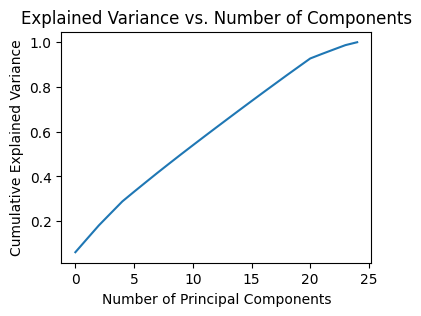

In [ ]:

X_train_pca, X_val_pca, X_test_pca =  apply_pca(X_train, X_val, X_test, 0.8)


## Classic Machine Learning Models

#### Classic Model Functions - Fitting Only

##### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_fit(x_train, y_train, n_neighbors=5, weights='uniform', metric='minkowski', p=None):

  if (p != None):
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)

    model.fit(x_train, y_train)

  else:
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

    model.fit(x_train, y_train)

  return model


##### Logistic Regression (GLM)

In [ ]:
import statsmodels.api as sm

def logistic_regression_glm_fit(x_train, y_train):

  x_train_with_constant = sm.add_constant(x_train)

  model = sm.GLM(y_train, x_train_with_constant, family=sm.families.Binomial())

  result = model.fit()

  return result


##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_fit (x_train, y_train, penalty, solver, class_weight):

  if (penalty):

    logistic_regression_model = LogisticRegression(penalty=penalty, solver=solver, class_weight=class_weight, random_state=42)

  else:

    logistic_regression_model = LogisticRegression(random_state=42)

  results = logistic_regression_model.fit(x_train, y_train)

  return results


##### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

def decision_tree_classifier_fit(x_train, y_train, class_weight):

  decision_tree_model = DTC(class_weight=class_weight, criterion="entropy", random_state=42)

  results = decision_tree_model.fit(x_train, y_train)

  print("Number of terminal nodes:", results.tree_.node_count)
  print("Depth of the tree:", results.tree_.max_depth)

  return results


##### Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def boosting_classifier_fit(x_train, y_train, n_estimators, learning_rate, max_depth):

  # Initialize the Gradient Boosting model
  gb_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)

  # Train the model
  results = gb_model.fit(x_train, y_train)

  return results

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_classifier_fit(x_train, y_train, n_estimators):

  rnd_forest_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
  rnd_forest_model.fit(X_train_resampled, Y_train_resampled)

  return rnd_forest_model

#### Spliting the data 70% 15% 15%

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data = split_data(df_with_dummies, target_column='Heart Disease Status_Yes', print_details=False)

----------------------------------------------------------------
Heart Disease dataset contain 9500 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '6650 (70.00%)', 'Validation Set': '1425 (15.00%)', 'Test Set': '1425 (15.00%)'}


#### K-NN

##### With Defaults

Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1089   69]
 [ 253   14]]
Accuracy: 0.77
Precision: 0.17
Recall: 0.05
F1 Score: 0.08
AUC-ROC Score: 0.4964


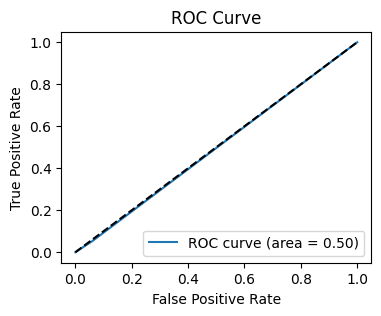

In [ ]:
knn_model = knn_fit(X_train, Y_train, n_neighbors=5)

y_pred = knn_model.predict(X_test)

print_classification_report(Y_test, y_pred)

##### Improving the model

Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[975 183]
 [228  39]]
Accuracy: 0.71
Precision: 0.18
Recall: 0.15
F1 Score: 0.16
AUC-ROC Score: 0.4940


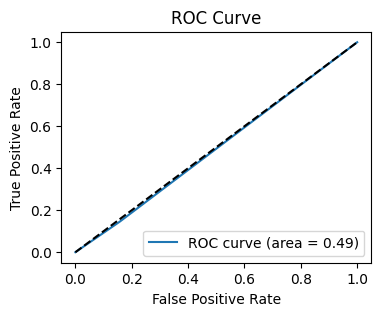

In [ ]:
knn_model = knn_fit(X_train_resampled, Y_train_resampled, n_neighbors=3, weights="distance", metric="euclidean", p=2)

y_pred = knn_model.predict(X_test)

print_classification_report(Y_test, y_pred)


#### Logistic Regression (GLM)

##### With Defautls

Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1158    0]
 [ 267    0]]
Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


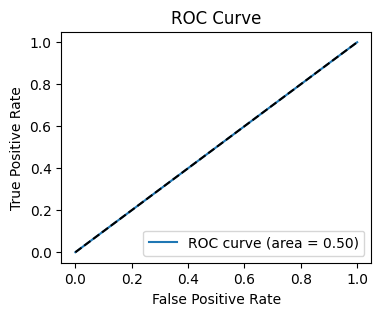

In [ ]:
x_data = X_train # X_train_resampled
y_data = Y_train # Y_train_resampled

x_train_with_constant = sm.add_constant(x_data)

result = logistic_regression_glm_fit(x_train_with_constant, y_data)

x_test_with_constant = sm.add_constant(X_test)

y_pred_prob = result.predict(x_test_with_constant)

y_pred = (y_pred_prob >= 0.5).astype(int)

print_classification_report(Y_test, y_pred)

##### Improving the model

Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1155    3]
 [ 266    1]]
Accuracy: 0.81
Precision: 0.25
Recall: 0.00
F1 Score: 0.01
AUC-ROC Score: 0.5006


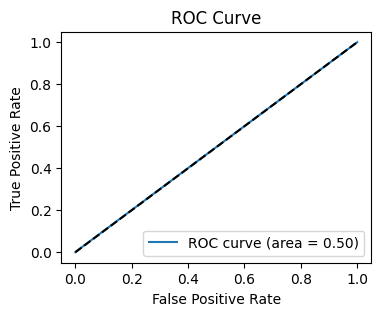

In [ ]:

x_train_with_constant = sm.add_constant(X_train_resampled)

result = logistic_regression_glm_fit(x_train_with_constant, Y_train_resampled)

x_test_with_constant = sm.add_constant(X_test)

y_pred_prob = result.predict(x_test_with_constant)

y_pred = (y_pred_prob >= 0.31).astype(int)

print_classification_report(Y_test, y_pred)


#### Logistic Regression

##### With Defaults

Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1158    0]
 [ 267    0]]
Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


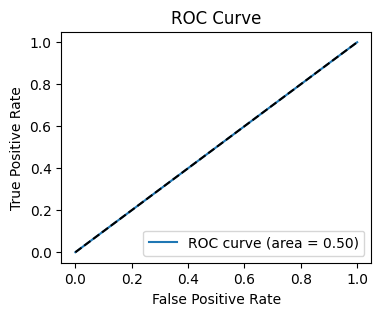

In [ ]:
logistic_regression_model = logistic_regression_fit(X_train, Y_train, penalty=None, solver='', class_weight='')

y_pred = logistic_regression_model.predict(X_test)

print_classification_report(Y_test, y_pred)

##### Improving the model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "class_weight": ["balanced", None]
}

log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="f1")
grid_search.fit(X_train_resampled, Y_train_resampled)

best_params = grid_search.best_params_
print(best_params)

{'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[597 561]
 [142 125]]
Accuracy: 0.51
Precision: 0.18
Recall: 0.47
F1 Score: 0.26
AUC-ROC Score: 0.4919


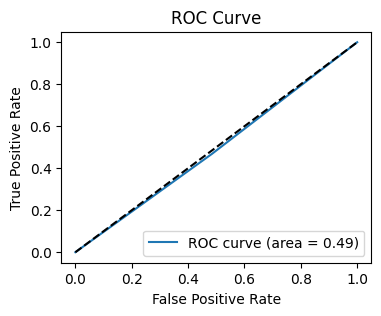

In [ ]:

logistic_regression_model = logistic_regression_fit(X_train_resampled, Y_train_resampled, penalty='l1', solver='liblinear', class_weight='balanced')

y_pred = logistic_regression_model.predict(X_test)

print_classification_report(Y_test, y_pred)

#### SVM

##### With Defaults

Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1158    0]
 [ 267    0]]
Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


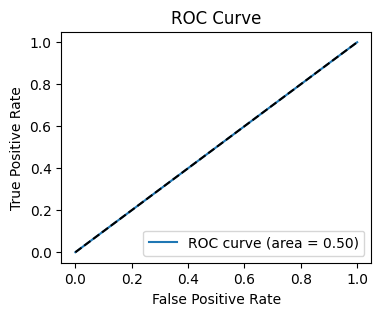

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Classification Report
print_classification_report(Y_test, y_pred)

##### Improving the model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1],  # Regularization strength
    'kernel': ['poly', 'rbf'],
    'gamma': ['scale', 'auto']  # Used for RBF kernel
}


# Grid Search with Cross-Validation
grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, Y_train_resampled)

best_svm = grid_search.best_estimator_

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}


Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[720 438]
 [174  93]]
Accuracy: 0.57
Precision: 0.18
Recall: 0.35
F1 Score: 0.23
AUC-ROC Score: 0.4850


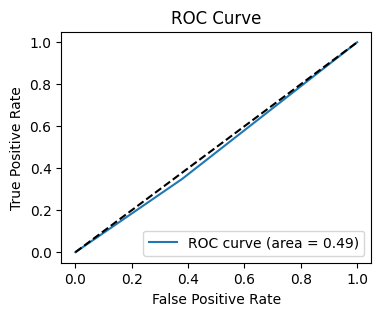

In [ ]:

y_pred_best = best_svm.predict(X_test)

print_classification_report(Y_test, y_pred_best)


#### Trees

##### Decision Tree Classifier

Number of terminal nodes: 2571
Depth of the tree: 38
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[682 476]
 [159 108]]
Accuracy: 0.55
Precision: 0.18
Recall: 0.40
F1 Score: 0.25
AUC-ROC Score: 0.4967


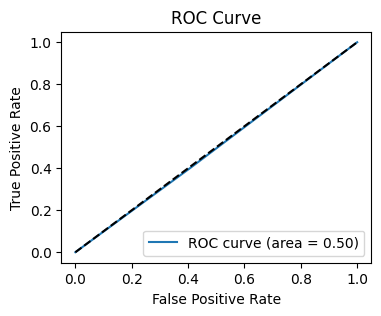

                       Feature  Importance
3                          BMI    0.100726
8           Homocysteine Level    0.097297
4                  Sleep Hours    0.093841
7                    CRP Level    0.092084
0                          Age    0.092006
2            Cholesterol Level    0.088479
5           Triglyceride Level    0.088028
6          Fasting Blood Sugar    0.087263
1               Blood Pressure    0.066560
16     Low HDL Cholesterol_Yes    0.016117
15     High Blood Pressure_Yes    0.015765
13    Family Heart Disease_Yes    0.014404
17    High LDL Cholesterol_Yes    0.014078
12                 Smoking_Yes    0.014007
14                Diabetes_Yes    0.013550
19  Alcohol Consumption_Medium    0.013467
9                  Gender_Male    0.013240
10         Exercise Habits_Low    0.011814
23       Sugar Consumption_Low    0.011651
18     Alcohol Consumption_Low    0.011592
21            Stress Level_Low    0.010395
11      Exercise Habits_Medium    0.010354
22         

In [ ]:

decision_tree_model = decision_tree_classifier_fit(X_train_resampled, Y_train_resampled, class_weight="balanced")

dtc_pred = decision_tree_model.predict(X_test)

print_classification_report(Y_test, dtc_pred)

feature_importance = pd.DataFrame({
    'Feature': df_with_dummies.drop('Heart Disease Status_Yes', axis=1).columns,
    'Importance': decision_tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


##### Boosting

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

gb_model = GradientBoostingClassifier(random_state=42)

# Define search space
param_dist = {
    "n_estimators": np.arange(50, 300, 50),
    "learning_rate": np.linspace(0.01, 0.2, 5),
    "max_depth": np.arange(3, 10, 2),
}

# Initialize and run randomized search
random_search = RandomizedSearchCV(
    gb_model, param_dist, n_iter=10, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
)
random_search.fit(X_train_resampled, Y_train_resampled)

# Print best parameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.0575}


Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[532 626]
 [125 142]]
Accuracy: 0.47
Precision: 0.18
Recall: 0.53
F1 Score: 0.27
AUC-ROC Score: 0.4956


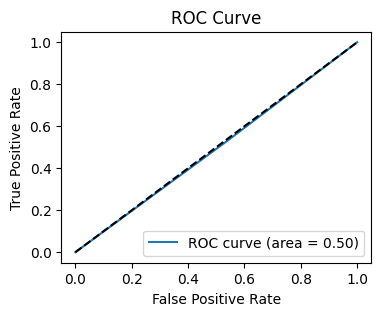

In [ ]:
boosting_model = boosting_classifier_fit(X_train_resampled, Y_train_resampled, 250, 0.0575, 9)

y_pred = boosting_model.predict(X_test)

print_classification_report(Y_test, y_pred)

##### Random Forest

Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1156    2]
 [ 267    0]]
Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.4991


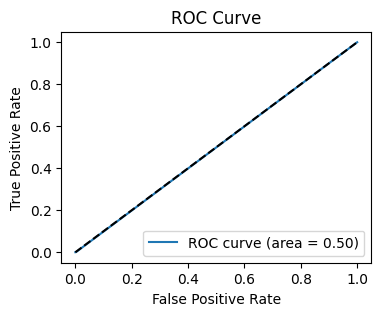

In [ ]:
rnd_forest_model = random_forest_classifier_fit(X_train_resampled, Y_train_resampled, n_estimators=2000)

y_pred = rnd_forest_model.predict(X_test)

print_classification_report(Y_test, y_pred)

##### Decision Trees With Forward Stepwise selection

Start forward selection with 25 predictors
Best Features: ['Cholesterol Level'] 0.2774108322324967
Best Features: ['Cholesterol Level', 'Alcohol Consumption_Low'] 0.2985842985842986
Best Features: ['Cholesterol Level', 'Alcohol Consumption_Low', 'Family Heart Disease_Yes'] 0.30289017341040464
Best Features: ['Cholesterol Level', 'Alcohol Consumption_Low', 'Family Heart Disease_Yes', 'High LDL Cholesterol_Yes'] 0.3080568720379147
Best Features: ['Cholesterol Level', 'Alcohol Consumption_Low', 'Family Heart Disease_Yes', 'High LDL Cholesterol_Yes', 'Stress Level_Medium'] 0.30677764565992865
Best Features: ['Cholesterol Level', 'Alcohol Consumption_Low', 'Family Heart Disease_Yes', 'High LDL Cholesterol_Yes', 'Stress Level_Medium', 'Alcohol Consumption_Medium'] 0.2972292191435768
Best Features: ['Cholesterol Level', 'Alcohol Consumption_Low', 'Family Heart Disease_Yes', 'High LDL Cholesterol_Yes', 'Stress Level_Medium', 'Alcohol Consumption_Medium', 'Stress Level_Low'] 0.28761651131824234

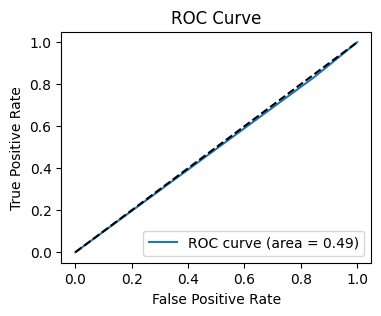

In [ ]:
from sklearn.preprocessing import StandardScaler

decision_tree_model = DTC(class_weight="balanced", criterion="entropy", random_state=42)

predictors, best_models = forward_stepwise_selection(train_data_resample, 'Heart Disease Status_Yes', decision_tree_model, test_data)

best_model_forward = max(best_models, key=best_models.get)
best_value = best_models[best_model_forward]

print("Best F1 Score:", best_value)
print("Features:", len(best_model_forward))
print("Features: ", best_model_forward)

best_data_features = list(best_model_forward)

scaler = StandardScaler()

x_best_features_train_resample = scaler.fit_transform(train_data_resample[best_data_features])
x_best_features_test = scaler.fit_transform(test_data[best_data_features])

decision_tree_model = decision_tree_classifier_fit(x_best_features_train_resample, Y_train_resampled, class_weight="balanced")

dtc_pred = decision_tree_model.predict(x_best_features_test)

print_classification_report(Y_test, dtc_pred)



##### Decision Tree with pruning

In [ ]:
import sklearn.model_selection as skm

decision_tree_model = DTC(class_weight="balanced", criterion="entropy", random_state=42)

ccp_path = decision_tree_model.cost_complexity_pruning_path(X_train, Y_train)
kfold = skm.KFold(5, shuffle=True, random_state=42)
grid = skm.GridSearchCV(decision_tree_model, {'ccp_alpha': ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring='accuracy', return_train_score=True)
G = grid.fit(X_train , Y_train)
best_ = grid.best_estimator_

Best ccp_alpha: 0.0
Number of terminal nodes: 2505
Depth of the tree: 41
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[895 263]
 [212  55]]
Accuracy: 0.67
Precision: 0.17
Recall: 0.21
F1 Score: 0.19
AUC-ROC Score: 0.4894


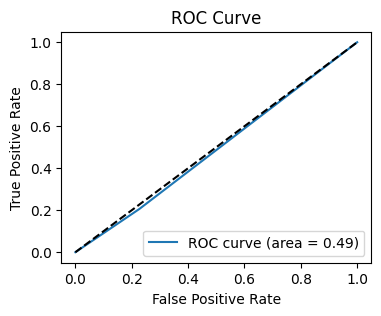

In [ ]:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

best_alpha = grid.best_params_['ccp_alpha']
print("Best ccp_alpha:", best_alpha)

pruned_dtc_pred = best_.predict(X_test)

print("Number of terminal nodes:", best_.tree_.node_count)
print("Depth of the tree:", best_.tree_.max_depth)
print_classification_report(Y_test, pruned_dtc_pred)

## Deep Learning Neural Network (ANN)

NOTE!   
Ensuring deterministic behavior is essential for reproducibility and consistency across runs.  
Setting **os.environ**['TF_DETERMINISTIC_OPS'] = '1' enforces deterministic TensorFlow operations, reducing hardware-related variations.  
Using **HeNormal(seed=42)** ensures stable weight initialization, preventing fluctuations in model performance due to randomness.  
This setup is crucial for controlled experiments, model comparisons, and debugging, allowing reliable evaluation of architectural and hyperparameter changes

#### Imports | Fitting Functions

##### imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.initializers import HeNormal, GlorotUniform

from tensorflow.keras.regularizers import l2

from tensorflow.keras.metrics import Recall, Precision, Accuracy

from tensorflow.keras import backend as K

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

from sklearn.utils import resample

import matplotlib.pyplot as plt

import os

tf.random.set_seed(42)

# Force TensorFlow to run in a deterministic manner
os.environ['TF_DETERMINISTIC_OPS'] = '1'

##### ANN Functions model | Simple | Complex | Advanced (Fitting Only)

In [ ]:
# Simple ANN model (Default Values)
def simple_ann_fit(X_train, Y_train, X_Val, Y_Val, X_test, Y_test, epochs=1):

  model = Sequential([
      Dense(24, activation='relu', kernel_initializer=HeNormal(seed=42)),  # Single hidden layer with 24 neurons
      Dense(1, activation='sigmoid', kernel_initializer=HeNormal(seed=42))  # Output layer for binary classification
  ])

  # Compile the model with default optimizer (Adam), loss, and metric
  model.compile(loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model using default batch size and epochs
  history = model.fit(X_train, Y_train, validation_data=(X_Val, Y_Val), epochs=epochs, verbose=1)

  # Evaluate the model
  test_loss, test_acc = model.evaluate(X_test, Y_test)

  print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

  print_prediction_stats(model, X_test)

  return model, history

def f1_score_inner(y_true, y_pred):
    y_pred = K.round(y_pred)  # Convert probabilities to binary (0 or 1)

    tp = K.sum(K.cast(y_true * y_pred, 'float'))  # True Positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'))  # False Positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'))  # False Negatives

    precision = tp / (tp + fp + K.epsilon())  # Precision calculation
    recall = tp / (tp + fn + K.epsilon())  # Recall calculation

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # F1-score formula
    return f1

# Improved ANN Model
def improved_ann_fit(X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=1, batch_size=32, metrics='accuracy', verbose=False,):

  #activation=LeakyReLU(negative_slope=.01), kernel_initializer=GlorotUniform(seed=42)),

  model = Sequential([
      Dense(32, activation=LeakyReLU(negative_slope=.01), kernel_initializer=HeNormal(seed=42)),
      BatchNormalization(),  # Normalizes layer outputs
      Dropout(0.2),  # Dropout layer to prevent overfitting
      Dense(128, activation='relu', kernel_initializer=HeNormal(seed=42), kernel_regularizer=l2(0.001)),
      BatchNormalization(),  # Normalizes layer outputs
      Dropout(0.2),  # Dropout layer to prevent overfitting
      Dense(128, activation='relu', kernel_initializer=HeNormal(seed=42), kernel_regularizer=l2(0.001)),
      BatchNormalization(),  # Normalizes layer outputs
      Dropout(0.2),  # Dropout layer to prevent overfitting
      Dense(128, activation='relu', kernel_initializer=HeNormal(seed=42), kernel_regularizer=l2(0.001)),
      BatchNormalization(),  # Normalizes layer outputs
      Dropout(0.2),  # Dropout layer to prevent overfitting
      Dense(128, activation='relu', kernel_initializer=HeNormal(seed=42), kernel_regularizer=l2(0.001)),
      BatchNormalization(),  # Normalizes layer outputs
      Dense(1, activation='sigmoid', kernel_initializer=HeNormal(seed=42))  # Output layer for binary classification
  ])

  if (metrics == 'f1_score'):
    metrics = [f1_score_inner]
  elif (metrics == 'roc_auc'):
    metrics = [tf.keras.metrics.AUC(name='auc_roc', curve='ROC')]
  elif (metrics == 'accuracy'):
    metrics = ['accuracy']
  elif (metrics == 'recall'):
    metrics = [Recall(name='recall')]
  elif (metrics == 'precision'):
    metrics = [Precision(name='precision')]
  else:
    metrics = ['accuracy']

  #optimizer='sgd',
  # Compile the model with default optimizer (Adam), loss, and metric
  model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=metrics)

    # Train the model using default batch size and epochs
  history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)

  # Evaluate the model
  test_loss, test_acc = model.evaluate(X_test, Y_test)

  print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

  print_prediction_stats(model, X_test, verbose)

  return model, history

# Complex ANN Model
def complex_ann_fit(X_train, Y_train, X_Val, Y_Val, X_test, Y_test, epochs=1, batch_size=32):

  model = Sequential([
      Dense(24, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
      Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
      Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
      Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=42))
  ])

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

  test_loss, test_acc = model.evaluate(X_test, Y_test)

  print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

  print_prediction_stats(model, X_test)

  return model, history

def plot_history(history):

  plt.figure(figsize=(4, 3))

  # Plot training & validation loss values
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')

  # Add labels and legend
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss Over Epochs')
  plt.legend()
  plt.show()

def print_prediction_stats(model, x_test, verbose=False):

  pred_range = model.predict(x_test)

  print("Predictino distribution stats:")

  mean = np.mean(pred_range)
  print(f"Mean Value: {mean}")

  median = np.median(pred_range)
  print(f"Median Value: {median}")

  unique_values, counts = np.unique(pred_range, return_counts=True)
  print(f"Unique Values: {len(unique_values)}/{len(pred_range)})")

  min_value = np.min(pred_range)
  print(f"Min Value: {min_value}")

  max_value = np.max(pred_range)
  print(f"Max Value: {max_value}")

  if verbose:
    print(f"Unique Values: {unique_values}")
    print(f"Counts: {counts}")

def print_model_weights(model):
  for i, layer in enumerate(model.layers):
      print(f"Layer {i+1} - {layer.name}")

      # Get layer weights
      layer_weights = layer.get_weights()

      # If the layer has weights, print them
      if len(layer_weights) > 0:
          print("Weights:")
          print(layer_weights[0])  # First element is the weight matrix
          if len(layer_weights) > 1:
              print("Biases:")
              print(layer_weights[1])  # Second element is the bias vector
      else:
          print("No trainable weights in this layer.")

      print("="*50)

#### Spliting the data 70% 15% 15%

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data = split_data(df_with_dummies, target_column='Heart Disease Status_Yes', print_details=False)

----------------------------------------------------------------
Heart Disease dataset contain 9500 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '6650 (70.00%)', 'Validation Set': '1425 (15.00%)', 'Test Set': '1425 (15.00%)'}


#### Running With Simple ANN + Defaults Parameters

In [ ]:
# Single hidden layer with 24 neurons
model, history = simple_ann_fit(X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=1)


208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5769 - loss: 0.7390 - val_accuracy: 0.7881 - val_loss: 0.5417
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.5297
Test Accuracy: 0.8063, Test Loss: 0.5189
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predictino distribution stats:
Mean Value: 0.20617298781871796
Median Value: 0.19402897357940674
Unique Values: 1424/1425)
Min Value: 0.011214607395231724
Max Value: 0.5977221131324768


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1148   10]
 [ 266    1]]
Accuracy: 0.81
Precision: 0.09
Recall: 0.00
F1 Score: 0.01
AUC-ROC Score: 0.4976


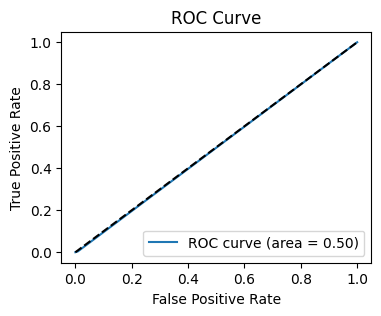

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, True)


#### Running With Different Hyper Parameters: Hidden Layers Structure | Epochs Number | Batch Size

##### base model (compile)

In [ ]:
def compile_base_model():

  model = Sequential([
      Dense(24, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
      Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
      Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
      Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=42))  # Output layer for binary classification
  ])

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

##### Different Hidden Layers Structure (20 epochs, batch_size=32)

In [ ]:
epochs = 20
batch_size=32

###### option 1

In [ ]:
model = Sequential([
    Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=42))  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)


Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7740 - loss: 0.5628 - val_accuracy: 0.7937 - val_loss: 0.5126
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5120 - val_accuracy: 0.7937 - val_loss: 0.5151
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5074 - val_accuracy: 0.7937 - val_loss: 0.5185
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7940 - loss: 0.5049 - val_accuracy: 0.7937 - val_loss: 0.5233
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.5030 - val_accuracy: 0.7937 - val_loss: 0.5243
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.5013 - val_accuracy: 0.7937 - val_loss: 0.5274
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.4989 - val_accuracy: 0.7937 - val_loss: 0.5308
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7946 - loss: 0.4965 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1130   28]
 [ 260    7]]
Accuracy: 0.80
Precision: 0.20
Recall: 0.03
F1 Score: 0.05
AUC-ROC Score: 0.5010


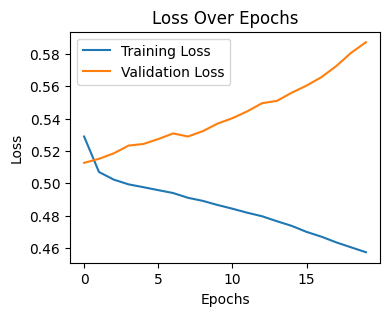

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

###### option 2

In [ ]:
model = Sequential([
    Dense(24, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(64, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=42))  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7770 - loss: 0.5478 - val_accuracy: 0.7937 - val_loss: 0.5150
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5130 - val_accuracy: 0.7937 - val_loss: 0.5143
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5083 - val_accuracy: 0.7937 - val_loss: 0.5133
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5065 - val_accuracy: 0.7937 - val_loss: 0.5148
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5049 - val_accuracy: 0.7937 - val_loss: 0.5222
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5006 - val_accuracy: 0.7937 - val_loss: 0.5268
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4962 - val_accuracy: 0.7937 - val_loss: 0.5336
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4923 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1148   10]
 [ 266    1]]
Accuracy: 0.81
Precision: 0.09
Recall: 0.00
F1 Score: 0.01
AUC-ROC Score: 0.4976


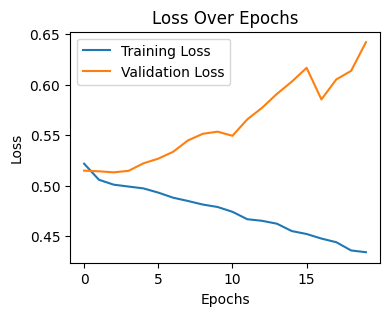

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

###### option 3

In [ ]:
model = Sequential([
    Dense(16, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(8, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(8, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(8, activation='relu', kernel_initializer=GlorotUniform(seed=42)),
    Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=42))  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7898 - loss: 0.5340 - val_accuracy: 0.7937 - val_loss: 0.5089
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5096 - val_accuracy: 0.7937 - val_loss: 0.5101
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5089 - val_accuracy: 0.7937 - val_loss: 0.5104
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5076 - val_accuracy: 0.7937 - val_loss: 0.5111
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5056 - val_accuracy: 0.7937 - val_loss: 0.5147
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5049 - val_accuracy: 0.7937 - val_loss: 0.5147
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5059 - val_accuracy: 0.7909 - val_loss: 0.5239
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5035 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1132   26]
 [ 265    2]]
Accuracy: 0.80
Precision: 0.07
Recall: 0.01
F1 Score: 0.01
AUC-ROC Score: 0.4925


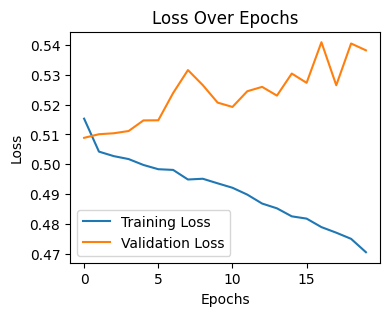

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

##### Different Epocs Number (Fixed Base Model, batch_size=32)

In [ ]:
batch_size = 32

###### option 1 | 5 Ephocs

In [ ]:
epochs = 5

model = compile_base_model()

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7770 - loss: 0.5478 - val_accuracy: 0.7937 - val_loss: 0.5150
Epoch 2/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5130 - val_accuracy: 0.7937 - val_loss: 0.5143
Epoch 3/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5083 - val_accuracy: 0.7937 - val_loss: 0.5133
Epoch 4/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5065 - val_accuracy: 0.7937 - val_loss: 0.5148
Epoch 5/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5049 - val_accuracy: 0.7937 - val_loss: 0.5222
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4968
Test Accuracy: 0.8126, Test Loss: 0.4902
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predictino distribution stats:
Mean Value: 0.19105194509029388
Median Value: 0.1985311359167099
Unique Values: 1425/1425)
Min Value: 0.022216785699129105
Max Value: 0.33359450101852417


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1158    0]
 [ 267    0]]
Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


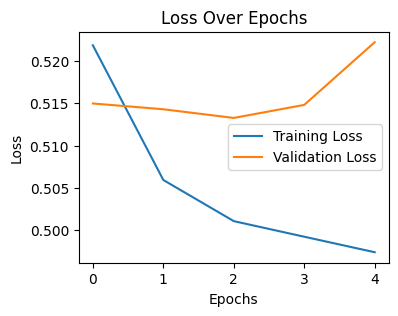

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

###### option 2 | 25 epohcs

In [ ]:
epochs = 25

model = compile_base_model()

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7770 - loss: 0.5478 - val_accuracy: 0.7937 - val_loss: 0.5150
Epoch 2/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5130 - val_accuracy: 0.7937 - val_loss: 0.5143
Epoch 3/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7938 - loss: 0.5083 - val_accuracy: 0.7937 - val_loss: 0.5133
Epoch 4/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5065 - val_accuracy: 0.7937 - val_loss: 0.5148
Epoch 5/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7938 - loss: 0.5049 - val_accuracy: 0.7937 - val_loss: 0.5222
Epoch 6/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7939 - loss: 0.5006 - val_accuracy: 0.7937 - val_loss: 0.5268
Epoch 7/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7954 - loss: 0.4962 - val_accuracy: 0.7937 - val_loss: 0.5336
Epoch 8/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4923 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1129   29]
 [ 264    3]]
Accuracy: 0.79
Precision: 0.09
Recall: 0.01
F1 Score: 0.02
AUC-ROC Score: 0.4931


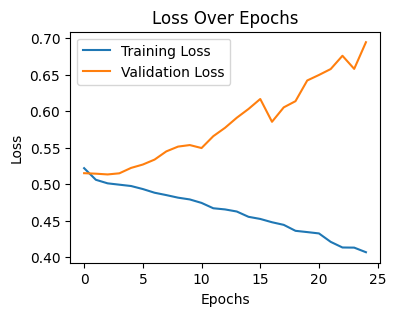

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

###### option 3 | 100 epochs

In [ ]:
epochs = 100

model = compile_base_model()

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7770 - loss: 0.5478 - val_accuracy: 0.7937 - val_loss: 0.5150
Epoch 2/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7938 - loss: 0.5130 - val_accuracy: 0.7937 - val_loss: 0.5143
Epoch 3/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5083 - val_accuracy: 0.7937 - val_loss: 0.5133
Epoch 4/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5065 - val_accuracy: 0.7937 - val_loss: 0.5148
Epoch 5/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7938 - loss: 0.5049 - val_accuracy: 0.7937 - val_loss: 0.5222
Epoch 6/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7939 - loss: 0.5006 - val_accuracy: 0.7937 - val_loss: 0.5268
Epoch 7/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7954 - loss: 0.4962 - val_accuracy: 0.7937 - val_loss: 0.5336
Epoch 8/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4923 - val_accu

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1009  149]
 [ 230   37]]
Accuracy: 0.73
Precision: 0.20
Recall: 0.14
F1 Score: 0.16
AUC-ROC Score: 0.5050


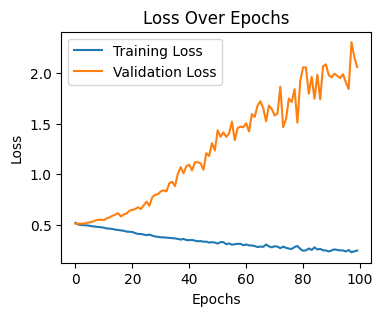

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

##### Different Batch Size  (Fixed Base Model, epochs=25)

In [ ]:
epochs = 25

###### option 1 | batch size: 16

In [ ]:

model = compile_base_model()

batch_size = 16

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7840 - loss: 0.5425 - val_accuracy: 0.7937 - val_loss: 0.5105
Epoch 2/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7938 - loss: 0.5105 - val_accuracy: 0.7937 - val_loss: 0.5102
Epoch 3/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5089 - val_accuracy: 0.7937 - val_loss: 0.5140
Epoch 4/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.5077 - val_accuracy: 0.7937 - val_loss: 0.5127
Epoch 5/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7932 - loss: 0.5071 - val_accuracy: 0.7937 - val_loss: 0.5123
Epoch 6/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7939 - loss: 0.5050 - val_accuracy: 0.7937 - val_loss: 0.5159
Epoch 7/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7934 - loss: 0.5055 - val_accuracy: 0.7937 - val_loss: 0.5188
Epoch 8/25
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5053 - val_accuracy: 0

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1157    1]
 [ 267    0]]
Accuracy: 0.81
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.4996


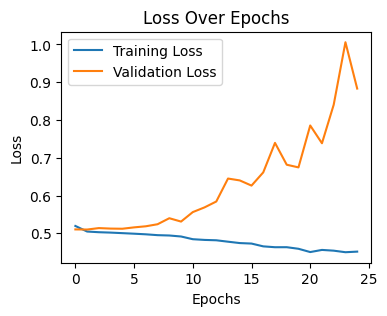

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

###### option 2 | batch size: 64

In [ ]:
batch_size = 64

model = compile_base_model()

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7680 - loss: 0.5527 - val_accuracy: 0.7937 - val_loss: 0.5114
Epoch 2/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.5092 - val_accuracy: 0.7937 - val_loss: 0.5097
Epoch 3/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7936 - loss: 0.5076 - val_accuracy: 0.7937 - val_loss: 0.5115
Epoch 4/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.5040 - val_accuracy: 0.7937 - val_loss: 0.5185
Epoch 5/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7936 - loss: 0.5008 - val_accuracy: 0.7937 - val_loss: 0.5235
Epoch 6/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7936 - loss: 0.4989 - val_accuracy: 0.7937 - val_loss: 0.5291
Epoch 7/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.4936 - val_accuracy: 0.7937 - val_loss: 0.5337
Epoch 8/25
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.4869 - val_accuracy: 0

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1029  129]
 [ 246   21]]
Accuracy: 0.74
Precision: 0.14
Recall: 0.08
F1 Score: 0.10
AUC-ROC Score: 0.4836


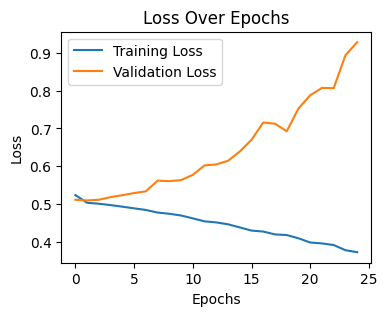

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

###### option 3 | batch size: 256

In [ ]:
batch_size = 256

model = compile_base_model()

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

print_prediction_stats(model, X_test)

Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7148 - loss: 0.5923 - val_accuracy: 0.7937 - val_loss: 0.5172
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7938 - loss: 0.5109 - val_accuracy: 0.7937 - val_loss: 0.5204
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7938 - loss: 0.5020 - val_accuracy: 0.7937 - val_loss: 0.5217
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7938 - loss: 0.4956 - val_accuracy: 0.7937 - val_loss: 0.5289
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7938 - loss: 0.4897 - val_accuracy: 0.7937 - val_loss: 0.5339
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7938 - loss: 0.4826 - val_accuracy: 0.7937 - val_loss: 0.5442
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7937 - loss: 0.4736 - val_accuracy: 0.7937 - val_loss: 0.5643
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7943 - loss: 0.4654 - val_accuracy: 0.7902 - val_loss

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[964 194]
 [220  47]]
Accuracy: 0.71
Precision: 0.20
Recall: 0.18
F1 Score: 0.19
AUC-ROC Score: 0.5042


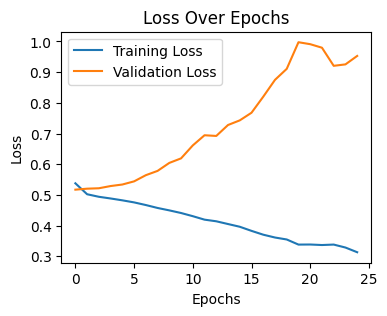

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

plot_history(history)

#### Modifying the Dataset: Achieving Better vs. Worse Results

##### Baseline: Run Vs Original Dataset

In [ ]:
model, history = complex_ann_fit(X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=25, batch_size=32)


Epoch 1/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7770 - loss: 0.5478 - val_accuracy: 0.7937 - val_loss: 0.5150
Epoch 2/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5130 - val_accuracy: 0.7937 - val_loss: 0.5143
Epoch 3/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5083 - val_accuracy: 0.7937 - val_loss: 0.5133
Epoch 4/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5065 - val_accuracy: 0.7937 - val_loss: 0.5148
Epoch 5/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.5049 - val_accuracy: 0.7937 - val_loss: 0.5222
Epoch 6/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7939 - loss: 0.5006 - val_accuracy: 0.7937 - val_loss: 0.5268
Epoch 7/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4962 - val_accuracy: 0.7937 - val_loss: 0.5336
Epoch 8/25
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7941 - loss: 0.4923 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1129   29]
 [ 264    3]]
Accuracy: 0.79
Precision: 0.09
Recall: 0.01
F1 Score: 0.02
AUC-ROC Score: 0.4931


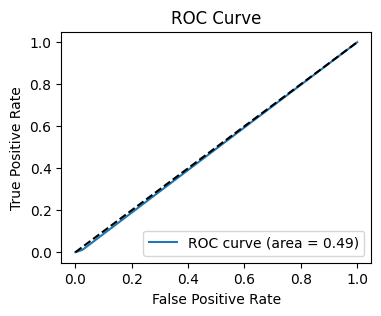

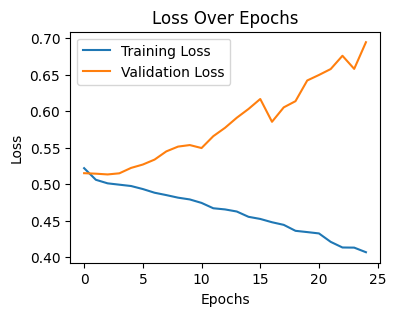

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, True)

plot_history(history)

##### Better Results - Run with new Dataset after resampling the original dataset to gain more rows with target 1

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
target_column = 'Heart Disease Status_Yes'  # Your target column
X = df_with_dummies.drop(columns=[target_column])
y = df_with_dummies[target_column]

# Apply SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target_column] = y_resampled  # Add target back

df_resampled[target_column].value_counts()

X_train_new, Y_train_new, X_val_new, Y_val_new, X_test_new, Y_test_new, train_data_new, test_data_new = split_data(df_resampled, target_column=target_column, print_details=True)

model, history = complex_ann_fit(X_train_new, Y_train_new, X_val_new, Y_val_new, X_test_new, Y_test_new, epochs=25, batch_size=32)


----------------------------------------------------------------
Heart Disease dataset contain 13674 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '9571 (69.99%)', 'Validation Set': '2051 (15.00%)', 'Test Set': '2052 (15.01%)'}
-------------TRAIN-------------------
Y_train counts: Heart Disease Status_Yes
0.0    5322
1.0    4249
Name: count, dtype: int64
Y_train 1 distribution 44.39%
-------------VALIDATION--------------
Y_val counts: Heart Disease Status_Yes
0.0    1133
1.0     918
Name: count, dtype: int64
Y_val 1 distribution 44.76%
-----------------TEST----------------
Y_test counts: Heart Disease Status_Yes
0.0    1142
1.0     910
Name: count, dtype: int64
Y_test 1 distribution 44.35%
-------------------------------------
Epoch 1/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5642 - loss: 0.6833 - val_accuracy: 0.5474 - val_loss: 0.6722
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6365 - loss:

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1142
1.0     910
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[878 264]
 [305 605]]
Accuracy: 0.72
Precision: 0.70
Recall: 0.66
F1 Score: 0.68
AUC-ROC Score: 0.7168


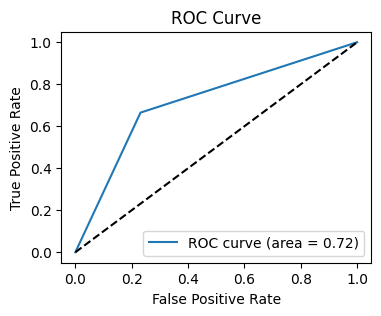

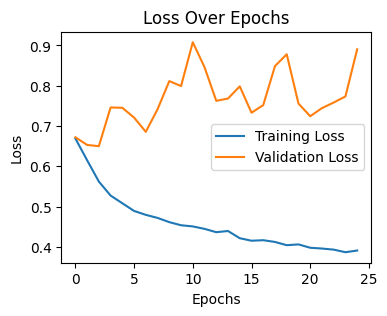

In [ ]:
y_pred_new = (model.predict(X_test_new) > 0.5).astype("int32")

print_classification_report(Y_test_new, y_pred_new, True)

plot_history(history)

##### Worse Results - Run with new Dataset after deleting rows with target 1

In [ ]:

df_target_0 = df_with_dummies[df_with_dummies[target_column] == 0]

df_target_1 = df_with_dummies[df_with_dummies[target_column] == 1]

df_target_1_reduced = df_target_1.drop(df_target_1.index[0:750])

df_balanced = pd.concat([df_target_0, df_target_1_reduced]).reset_index(drop=True)

X_train_new, Y_train_new, X_val_new, Y_val_new, X_test_new, Y_test_new, train_data_new, test_data_new = split_data(df_balanced, target_column=target_column, print_details=True)

model, history = complex_ann_fit(X_train_new, Y_train_new, X_val_new, Y_val_new, X_test_new, Y_test_new, epochs=15, batch_size=32)


----------------------------------------------------------------
Heart Disease dataset contain 8750 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '6125 (70.00%)', 'Validation Set': '1312 (14.99%)', 'Test Set': '1313 (15.01%)'}
-------------TRAIN-------------------
Y_train counts: Heart Disease Status_Yes
0.0    5318
1.0     807
Name: count, dtype: int64
Y_train 1 distribution 13.18%
-------------VALIDATION--------------
Y_val counts: Heart Disease Status_Yes
0.0    1130
1.0     182
Name: count, dtype: int64
Y_val 1 distribution 13.87%
-----------------TEST----------------
Y_test counts: Heart Disease Status_Yes
0.0    1149
1.0     164
Name: count, dtype: int64
Y_test 1 distribution 12.49%
-------------------------------------
Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8558 - loss: 0.4151 - val_accuracy: 0.7937 - val_loss: 0.5459
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8747 - loss: 

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Heart Disease Status_Yes
0.0    1149
1.0     164
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1149    0]
 [ 164    0]]
Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


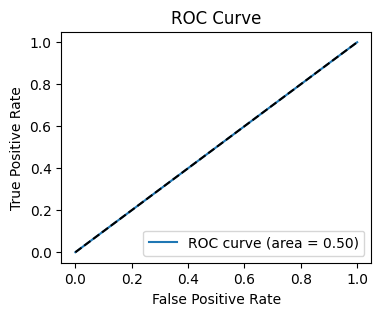

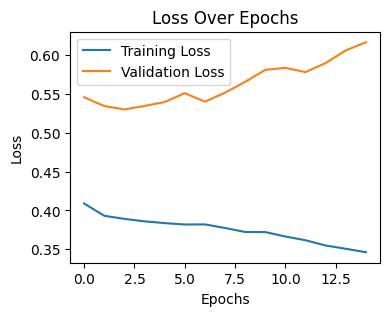

In [ ]:
y_pred_new = (model.predict(X_test_new) > 0.5).astype("int32")

print_classification_report(Y_test_new, y_pred_new, True)

plot_history(history)

#### Architecture Improvments

In [ ]:
metrics='f1_score'
metrics='recall'
metrics='accuracy'

model, history = improved_ann_fit(X_train_resampled, Y_train_resampled, X_val, Y_val, X_test, Y_test, epochs=50, batch_size=32, verbose=False, metrics=metrics)



Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6111 - loss: 1.7585 - val_accuracy: 0.7909 - val_loss: 1.4518
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7581 - loss: 1.4739 - val_accuracy: 0.7937 - val_loss: 1.3499
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7591 - loss: 1.3719 - val_accuracy: 0.7930 - val_loss: 1.2631
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7639 - loss: 1.2746 - val_accuracy: 0.7923 - val_loss: 1.1739
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7649 - loss: 1.1867 - val_accuracy: 0.7930 - val_loss: 1.0945
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7655 - loss: 1.0982 - val_accuracy: 0.7937 - val_loss: 1.0162
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7646 - loss: 1.0254 - val_accuracy: 0.7937 - val_loss: 0.9526
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7657 - loss: 0.9518 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1052  106]
 [ 249   18]]
Accuracy: 0.75
Precision: 0.15
Recall: 0.07
F1 Score: 0.09
AUC-ROC Score: 0.4879


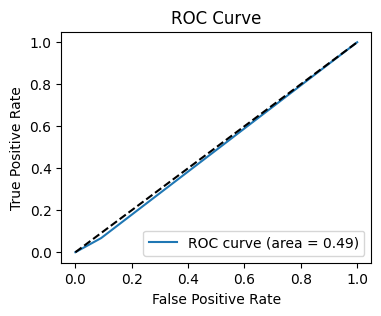

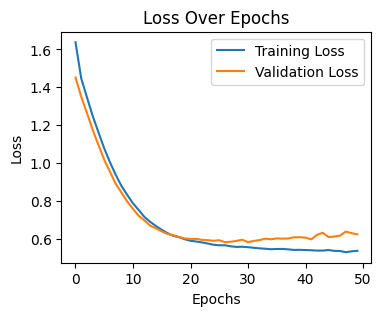

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, True)

plot_history(history)


#### Different Metrics Score | Precision

In [ ]:
model, history = improved_ann_fit(X_train_resampled, Y_train_resampled, X_val, Y_val, X_test, Y_test, epochs=25, batch_size=32, verbose=False, metrics='precision')

Epoch 1/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.7417 - precision: 0.2473 - val_loss: 1.4606 - val_precision: 0.1333
Epoch 2/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.4840 - precision: 0.2407 - val_loss: 1.3596 - val_precision: 0.0000e+00
Epoch 3/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3731 - precision: 0.3371 - val_loss: 1.2727 - val_precision: 0.0000e+00
Epoch 4/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2790 - precision: 0.2978 - val_loss: 1.1761 - val_precision: 1.0000
Epoch 5/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1887 - precision: 0.3038 - val_loss: 1.0925 - val_precision: 0.0000e+00
Epoch 6/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1038 - precision: 0.3601 - val_loss: 1.0183 - val_precision: 0.3333
Epoch 7/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0239 - precision: 0.3535 - val_loss: 0.9520 - val_precision: 0.0000e+00
Epoch 8/25
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9613 - preci

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1158
1.0     267
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1130   28]
 [ 259    8]]
Accuracy: 0.80
Precision: 0.22
Recall: 0.03
F1 Score: 0.05
AUC-ROC Score: 0.5029


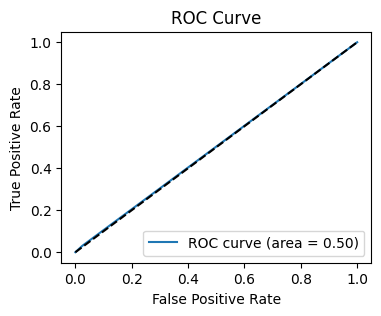

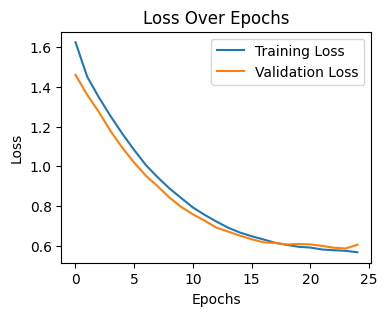

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, True)

plot_history(history)

#### Playing with the Balance Size (Training vs Validation vs Testing)

##### 80% Training | 10% Val | 10% Test

----------------------------------------------------------------
Heart Disease dataset contain 9500 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '7600 (80.00%)', 'Validation Set': '950 (10.00%)', 'Test Set': '950 (10.00%)'}
Epoch 1/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6463 - loss: 1.7062 - val_accuracy: 0.7937 - val_loss: 1.4342
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7863 - loss: 1.4240 - val_accuracy: 0.7958 - val_loss: 1.3253
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7915 - loss: 1.3137 - val_accuracy: 0.7958 - val_loss: 1.2194
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7945 - loss: 1.2121 - val_accuracy: 0.7958 - val_loss: 1.1240
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7937 - loss: 1.1107 - val_accuracy: 0.7958 - val_loss: 1.0391
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7934 - loss:

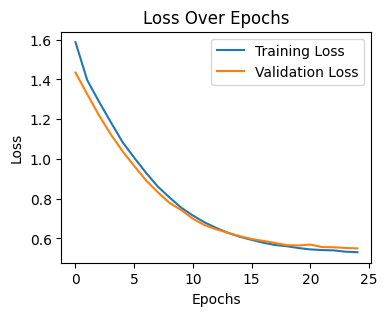

In [ ]:
test_vs_train = 0.2
test_vs_val = 0.5

X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data = split_data(df_with_dummies, target_column='Heart Disease Status_Yes',print_details=False, test_size_vs_train=test_vs_train, test_vs_val=test_vs_val)

model, history = improved_ann_fit(X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=25, batch_size=32)

plot_history(history)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Heart Disease Status_Yes
0.0    785
1.0    165
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[785   0]
 [165   0]]
Accuracy: 0.83
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
AUC-ROC Score: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### 50% Training | 25% Val | 25% Test

----------------------------------------------------------------
Heart Disease dataset contain 9500 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '4750 (50.00%)', 'Validation Set': '2375 (25.00%)', 'Test Set': '2375 (25.00%)'}
Epoch 1/25
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6006 - loss: 1.7645 - val_accuracy: 0.8122 - val_loss: 1.4632
Epoch 2/25
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7764 - loss: 1.4803 - val_accuracy: 0.8118 - val_loss: 1.3887
Epoch 3/25
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7992 - loss: 1.3758 - val_accuracy: 0.8114 - val_loss: 1.3148
Epoch 4/25
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7975 - loss: 1.3151 - val_accuracy: 0.8131 - val_loss: 1.2613
Epoch 5/25
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7988 - loss: 1.2519 - val_accuracy: 0.8126 - val_loss: 1.1896
Epoch 6/25
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8014 - lo

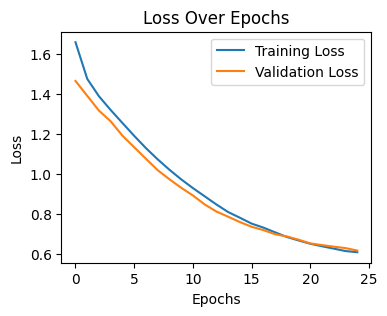

In [ ]:
test_vs_train = 0.5
test_vs_val = 0.5

X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data = split_data(df_with_dummies, target_column='Heart Disease Status_Yes',print_details=False, test_size_vs_train=test_vs_train, test_vs_val=test_vs_val)

model, history = improved_ann_fit(X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=25, batch_size=32)

plot_history(history)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, False)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1915
1.0     460
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1896   19]
 [ 449   11]]
Accuracy: 0.80
Precision: 0.37
Recall: 0.02
F1 Score: 0.04
AUC-ROC Score: 0.5070


##### 25% Training | 50% Val | 25% Test

----------------------------------------------------------------
Heart Disease dataset contain 9500 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '2375 (25.00%)', 'Validation Set': '4750 (50.00%)', 'Test Set': '2375 (25.00%)'}
Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5511 - loss: 1.8447 - val_accuracy: 0.7766 - val_loss: 1.5428
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7365 - loss: 1.5553 - val_accuracy: 0.7977 - val_loss: 1.4809
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7650 - loss: 1.4973 - val_accuracy: 0.7977 - val_loss: 1.4485
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7850 - loss: 1.4276 - val_accuracy: 0.7973 - val_loss: 1.4168
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7981 - loss: 1.4007 - val_accuracy: 0.7992 - val_loss: 1.3862
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7857 - loss: 1.374

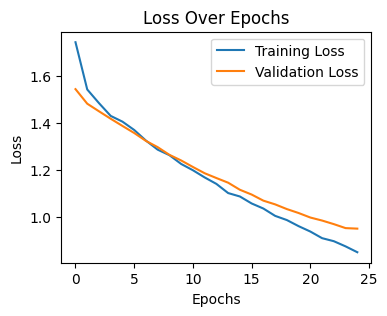

In [ ]:
test_vs_train = 0.75
test_vs_val = 0.3333

X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data = split_data(df_with_dummies, target_column='Heart Disease Status_Yes',print_details=False, test_size_vs_train=test_vs_train, test_vs_val=test_vs_val)

model, history = improved_ann_fit(X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=25, batch_size=32)

plot_history(history)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    1911
1.0     464
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[1881   30]
 [ 453   11]]
Accuracy: 0.80
Precision: 0.27
Recall: 0.02
F1 Score: 0.04
AUC-ROC Score: 0.5040


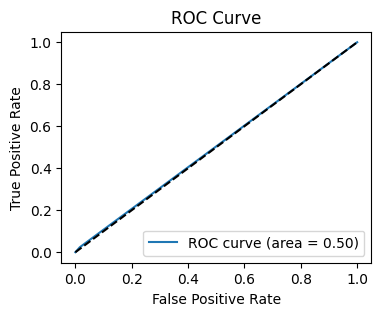

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, True)

#### Reduct Dataset Dimensions using PCA

##### Baseline - without reduction

----------------------------------------------------------------
Heart Disease dataset contain 9500 rows and 26 columns.
----------------------------------------------------------------
{'Training Set': '7600 (80.00%)', 'Validation Set': '950 (10.00%)', 'Test Set': '950 (10.00%)'}
Epoch 1/15
238/238 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.6367 - loss: 1.7149 - val_accuracy: 0.7937 - val_loss: 1.4372
Epoch 2/15
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7873 - loss: 1.4263 - val_accuracy: 0.7947 - val_loss: 1.3316
Epoch 3/15
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7914 - loss: 1.3097 - val_accuracy: 0.7947 - val_loss: 1.2218
Epoch 4/15
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7925 - loss: 1.2035 - val_accuracy: 0.7958 - val_loss: 1.1263
Epoch 5/15
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7925 - loss: 1.1074 - val_accuracy: 0.7947 - val_loss: 1.0315
Epoch 6/15
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7942 

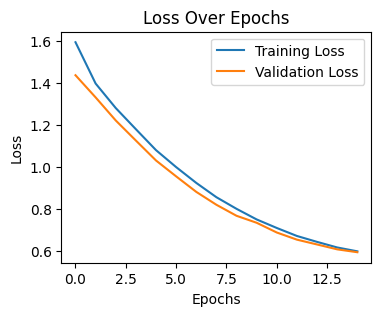

In [ ]:
test_vs_train = 0.2
test_vs_val = 0.5

X_train, Y_train, X_val, Y_val, X_test, Y_test, train_data, test_data = split_data(df_with_dummies, target_column='Heart Disease Status_Yes',print_details=False, test_size_vs_train=test_vs_train, test_vs_val=test_vs_val)

model, history = improved_ann_fit(X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=15, batch_size=32)

plot_history(history)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Heart Disease Status_Yes
0.0    3051
1.0     749
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[3027   24]
 [ 741    8]]
Accuracy: 0.80
Precision: 0.25
Recall: 0.01
F1 Score: 0.02
AUC-ROC Score: 0.5014


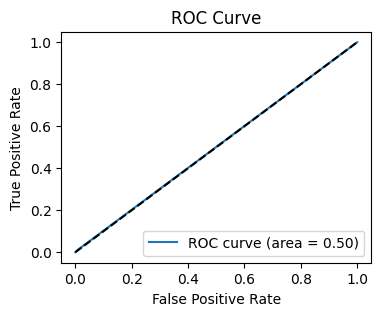

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print_classification_report(Y_test, y_pred, True)

##### Apply PCA

Number of components to retain 80.0% of variance: 18


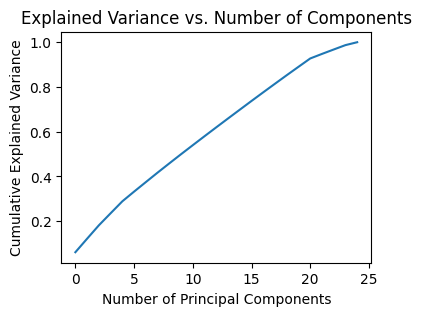

Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6081 - loss: 1.7594 - val_accuracy: 0.7926 - val_loss: 1.4444
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7547 - loss: 1.4787 - val_accuracy: 0.7947 - val_loss: 1.3399
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7634 - loss: 1.3659 - val_accuracy: 0.7958 - val_loss: 1.2496
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7656 - loss: 1.2766 - val_accuracy: 0.7958 - val_loss: 1.1541
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7639 - loss: 1.1768 - val_accuracy: 0.7947 - val_loss: 1.0716
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7630 - loss: 1.0962 - val_accuracy: 0.7958 - val_loss: 0.9992
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7644 - loss: 1.0126 - val_accuracy: 0.7958 - val_loss: 0.9360
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7638 - loss: 0.9511 - val_accuracy: 

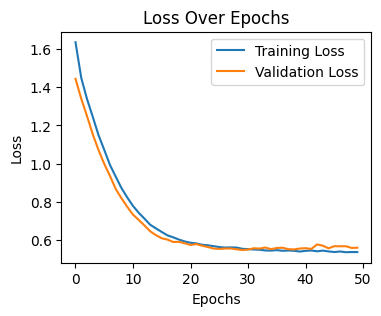

In [ ]:

X_train_pca, X_val_pca, X_test_pca =  apply_pca(X_train_resampled, X_val, X_test, 0.8)

model, history = improved_ann_fit(X_train_pca, Y_train_resampled, X_val_pca, Y_val, X_test_pca, Y_test, epochs=50, batch_size=32)

plot_history(history)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Heart Disease Status_Yes
0.0    785
1.0    165
Name: count, dtype: int64
[[TN FP] 
 [FN TP]]
[[512 273]
 [ 99  66]]
Accuracy: 0.61
Precision: 0.19
Recall: 0.40
F1 Score: 0.26
AUC-ROC Score: 0.5261


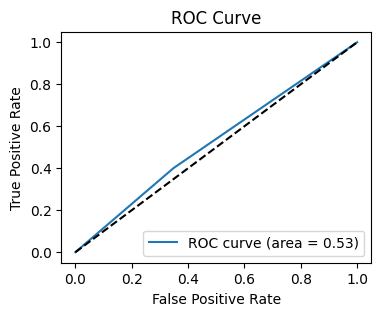

In [ ]:
y_pred = (model.predict(X_test_pca) > 0.25).astype("int32")

print_classification_report(Y_test, y_pred, True)

## LAB

#### Neural Network | Model Evaluation

#### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

y_pred = (model.predict(X_test) > 0.2).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

y_test_counts = Y_test.value_counts()

print(y_test_counts)

print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

  # AUC-ROC Score
auc_roc = roc_auc_score(Y_test, y_pred)
print(f"AUC-ROC Score: {auc_roc:.4f}")
# print(classification_report(y_true, y_pred))


fpr, tpr, thresholds = roc_curve(Y_test, y_pred, pos_label=y.unique()[1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### accuracy | precision | recall | F1 score

In [ ]:
# [[TN FP]
#  [FN TP]]

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

TN, FP, FN, TP